In [11]:
from openpyxl.utils import get_column_letter
from openpyxl.styles import Border, Side
from openpyxl.chart import LineChart, Reference
from openpyxl.styles import Alignment
from openpyxl.styles import Font
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl

workbook = openpyxl.load_workbook('planilha/despesas.xlsx')

In [63]:
#adiciona colunas, dados as celulas, alinhamento da palavras e adiciona bordas ao cabecalho

ws = workbook.active
ws.insert_cols(5, amount=2)

ws['E1'] = 'Método de pagamento'
ws['F1'] = 'Tipo de despesa'

ws['E1'].alignment = Alignment(horizontal = 'center')
ws['F1'].alignment = Alignment(horizontal = 'center')

ws["E1"].border = Border(left=borda, right=borda, bottom=borda)
ws["F1"].border = Border(left=borda, right=borda, bottom=borda)

for col in range(1, ws.max_column + 1):
    ws.column_dimensions[get_column_letter(col)].width = 25

ws['E2'] = 'Cartao de debito'
ws['E3'] = 'Dinheiro'
ws['E4'] = 'Cartao de debito'

ws['F2'] = 'Fixa'
ws['F3'] = 'Fixa'
ws['F4'] = 'Variavel'

ws['E1'].font = Font(bold=True)
ws['F1'].font = Font(bold=True)

borda = Side(border_style="thin", color="000000")

In [64]:
#adiciona conteudo de um csv para a planilha excel e posicional o conteudo das celulas apartir da segunda na esquerda

df = pd.read_csv('csv/despesas_geradas.csv', sep=";", encoding="utf-8")

for r_idx, row in enumerate(df.itertuples(index=False), start=4):
    for c_idx, value in enumerate(row, start=1):
        ws.cell(row=r_idx, column=c_idx, value=value)


alignment = Alignment(horizontal='left')

for row in ws.iter_rows():
    for cell in row:
        cell.alignment = alignment

workbook.save('despesas_atualizada.xlsx')

(array([0, 1]), [Text(0, 0, 'Variável'), Text(1, 0, 'Fixa')])

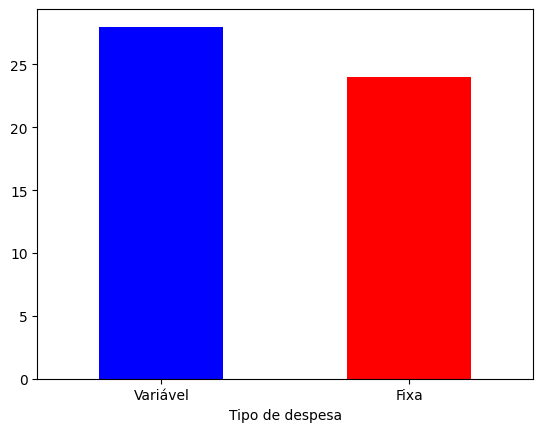

In [10]:
#gera um grafico para comparar as dispesas

df2 = pd.read_excel('despesas_atualizada.xlsx')

conta_despesa = df2['Tipo de despesa'].value_counts()

conta_despesa.plot(kind='bar', color=['blue', 'red'])
plt.xticks(rotation=0)